<a href="https://colab.research.google.com/github/mykolesiko/eeg_article/blob/main/MADE_baseline_report_noneutral_article2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.chdir("/content/drive/MyDrive/MADE/Project/deap")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pickle
x = pickle.load(open('./data_preprocessed_python/s01.dat', 'rb'), encoding='latin1')

In [6]:
data = x['data']
labels = x['labels']

The logarithms of the spectral power from
theta (4-8 Hz), slow alpha (8-10 Hz), alpha (8-12 Hz), beta
(12-30Hz) and gamma (30+ Hz) bands were extracted
from all 32 electrodes as features. In addition to power
spectral features the difference between the spectral
power of all the symmetrical pairs of electrodes on
the right and left hemisphere was extracted to measure
the possible asymmetry in the brain activities due to
emotional stimuli. 

Пары симметричных каналов слева-справа и спереди-сзади

In [7]:
import scipy
from  scipy import signal
freq, power = signal.welch(data[0][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
freq_ranges = [range(4,9), range(8,11), range(8,13), range(12, 31), range(30,48)]
pairs_canals = [[1, 17], [2, 18], [3, 20], [4, 21], [5, 22], [6, 23], [7, 25], [8, 26], [9, 27], [10, 28], [11, 29], [12, 30], [13, 31], [14, 32]]
#FC5-CP5, FC1-CP1, FC2-CP2, FC6-CP6, F7-P7, F3-P3, Fz-Pz,F4-P4, F8-P8, Fp1-O1, Fp2-O2
pairs_canals_1 = [[6, 21], [5, 9], [26, 30], [21, 25], [3, 11], [4, 12], [31, 32], [27, 19], [28, 20], [1, 15], [30, 17] ]
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
max_freq = 128
NVIDEOS = 40
NCANALS = 32

In [8]:
print(freq)
print(freq_resolution)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64. ]
0.5


Считываем данные


In [ ]:
import glob
data = []
labels = []
data_dir = './data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.dat"))

for file_data in files:
    raw_data = pickle.load(open(file_data, 'rb'), encoding='latin1')
    data.append(raw_data['data'])
    labels.append(raw_data['labels'])

Выделяем нейтральные эмоции в отдельный класс (0, 1, 2)

In [ ]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0
num_10 = 0
num_20 = 0
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] >= 5.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_10 += cnt1[0]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  num_20 += cnt2[0]
 
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1, num_10,num_21/num2, num_22/num2, num_20)   
labels_all_3 = np.vstack(labels_3)  

а тут только два класса


In [ ]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0


for i in range(32):
  neg = labels[i] < 4.5
  pos = labels[i] >= 4.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1,num_21/num2, num_22/num2)   
labels_all_3 = np.vstack(labels_3)  

In [ ]:
# columns = [f'DE_b{i + 1}_c{j + 1}' for i   in range(5) for j in range(32)] + \
#           [f'DASM_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals] + \
#           [f'RASM_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals] + \
#           [f'DCAU_b{i + 1}_p{pair}' for i  in range(5) for pair in pairs_canals_1] 
# columns = [('DE', i, j)  for i  in range(5) for j in range(32)] + \
#           [('DASM', i, pair) for i  in range(5) for pair in pairs_canals] + \
#           [('RASM', i, pair) for i  in range(5) for pair in pairs_canals] + \
#           [('DCAU', i, pair) for i  in range(5) for pair in pairs_canals_1] 
columns = [('DE', i, j)  for i  in range(5) for j in range(32)] + \
          [('DASM', i, j) for i  in range(5) for j in range(14)] + \
          [('RASM', i, j) for i  in range(5) for j in range(14)] + \
          [('DCAU', i, j) for i  in range(5) for j in range(11)] 
features_df = pd.DataFrame(columns = pd.MultiIndex.from_tuples(columns))

In [ ]:
print(features_df)

In [ ]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
features = ['DE', 'DASM', 'RASM', 'DCAU', 'alpha/beta', 'alpha/(beta + teta)']
def get_features_whole2(data, labels, freq_resolution, max_freq, feature_list):
  features_df = pd.DataFrame(columns = pd.MultiIndex.from_tuples(columns))
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    l = 0
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution +1))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            if 'DE' in feature_list or f'DE{k+1}' in feature_list:
                data_for_one_video.extend([np.log(mean_power)])
                features_df.loc[id, ('DE', k, i)] = np.log(mean_power)
                #print(np.log(mean_power))
                l += 1
                #print(l)
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        # if 'feature1' in feature_list:
        #            data_for_one_video.extend([np.log(powers[2])/np.log(powers[3])])
        # if 'feature2' in feature_list:
        #            data_for_one_video.extend([np.log(powers[2])/np.log(powers[3]) + np.log(powers[0])])          
        if 'alpha/beta' in feature_list:
                    data_for_one_video.extend([(powers[i, 2])/(powers[i, 3])])
        if 'alpha/(beta + teta)' in feature_list:
                    data_for_one_video.extend([(powers[i, 2])/(powers[i, 3]) + (powers[i, 0])])        
            
    for s, pair in enumerate(pairs_canals):
        #print(pair)
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.log(powers[canal_1]) -  np.log(powers[canal_2]) 
        #print(temp.shape)
        for k in range(5):
          if ('DASM' in feature_list) or (f'DASM{k+1}' in feature_list):
             data_for_one_video.extend([temp[k]])  
             features_df.loc[id, ('DASM', k, s)] = temp[k]
             #print('**1')
        #print(len(data_for_one_video))
        temp = np.log(powers[canal_1])/np.log(powers[canal_2])
        #print(temp)
        for k in range(5):
          if 'RASM' in feature_list or f'RASM{k+1}' in feature_list:
             data_for_one_video.extend([temp[k]]) 
             features_df.loc[id, ('RASM', k, s)] = temp[k]   
             #print('**3')
        #data_for_one_video.append(one_canal)    

    for s, pair in enumerate(pairs_canals_1):
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp =  np.log(powers[canal_1]) -   np.log(powers[canal_2])
        #print(temp)
        for k in range(5):
          if 'DCAU' in feature_list or f'DCAU{k+1}' in feature_list:
             data_for_one_video.extend([temp[k]]) 
             features_df.loc[id, ('DCAU', k, s)] = temp[k]
             #print('**2')

        #temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        #data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())           
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    #print(temp.shape)
    #temp[0:160] = stats.zscore(temp[0:160])
    #temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
  result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  #print(result.shape)
  return result, features_df#np.asarray(data_for_videos)     



In [ ]:
print(len(data_for_videos))

In [ ]:
import pandas as pd
emotion = ['valence', 'arousal']#, 'dominance', 'like']
f1_data_sum = pd.DataFrame(columns = features, index = emotion)
acc_data_sum = pd.DataFrame(columns = features, index = emotion)


In [ ]:
print(features)

In [ ]:
data_for_videos = []
features =['DCAU1']# [f'DE{i + 1}' for i in range(5)] + ['DE']
for i in  range(1):
       data_for_videos.append(get_features_whole2(data[i], labels[i], freq_resolution, max_freq, features ))

In [ ]:
print( data_for_videos[0].shape)

In [194]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import SelectFromModel

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
#threshold = 0.5
k = 5
labels_common = []

def get_metrics(features):
    result_f1 = []
    result_acc = []
    data_for_videos = []
    for i in  range(len(data)):
            result, features_df = get_features_whole2(data[i], labels[i], freq_resolution, max_freq, features )
            data_for_videos.append(result)
    for i_em in range(2):
        print(i_em)
        f1_all = []
        acc_all = []
        train_indexes = []
        test_indexes = []
        for j in range(32):
                # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
            train_indexes.append([])    
            test_indexes.append([])    
            #X = np.arange(40)
            y = np.array(labels_3[j][:, i_em])
            y = y[y!=0]
            #print(y)
            X = np.arange(len(y))
            
            if len(y) != 0 :
                skf = StratifiedKFold(n_splits=k, random_state=2021, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)
            else:
               for fold in range(k):
                  train_indexes[-1].append([])
                  test_indexes[-1].append([])      
        
        f1_data = pd.DataFrame(columns = range(k), index = range(32))
        acc_data = pd.DataFrame(columns = range(k), index = range(32))

        for fold in range(k):
            print(fold)
            f1_sub = []
            acc_sub = []

            data_train = []
            data_test = []
            labels_train = []
            labels_test = []
            labels_check = []
            for i in range(32):
             
                  #print( labels_subject_train[i])
               ltemp = labels_3[i][:, i_em]

                  #print(ltemp)
               ltemp1 = ltemp[ltemp != 0]
               if len(ltemp1) != 0:   
                  data_temp = data_for_videos[i][ltemp != 0 ]
                  #print(data_temp.shape)
                  #print(data_temp.shape)
                  data_subject_train = data_temp[train_indexes[i][fold]]
                  labels_subject_train = ltemp1[train_indexes[i][fold]]
                  #print( labels_subject_train)


                  #if len(labels_subject_train[labels_subject_train == 1]) != 0 and  len(labels_subject_train[labels_subject_train == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_train, labels_subject_train = ros.fit_resample(data_subject_train, labels_subject_train)

                  data_train.append(data_subject_train)
                  labels_train.extend(labels_subject_train)

                  data_subject_test = data_temp[test_indexes[i][fold]]
                  labels_subject_test = ltemp1[test_indexes[i][fold]]
                  #if len(labels_subject_test[labels_subject_test == 1]) != 0 and  len(labels_subject_test[labels_subject_test == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_test, labels_subject_test = ros.fit_resample(data_subject_test, labels_subject_test)

                  data_test.append(data_subject_test)
                  labels_test.extend(labels_subject_test)
                  labels_check.append(labels_subject_test)

            data_train_all = np.vstack(data_train)
            data_test_all = np.vstack(data_test)   
            data_all = np.vstack((data_train_all, data_test_all))
            labels_all = np.hstack((labels_train, labels_test))
            print(data_all.shape)
            #print(len(labels_train))
            #print(data_train_all.shape)

            #model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
            model = RandomForestClassifier(n_estimators = 100,  minclass_weight = 'balanced')
            #model = ExtraTreesClassifier()
            pca = PCA(n_components=200, svd_solver='full')
            pca.fit_transform(data_train_all)
           

#             clf = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
# clf.fit(X, y)
            #clf = LDA(n_components = 1)
            #data_train_all = clf.fit_transform(data_train_all, labels_train)
            #model =  GaussianNB()
            model = model.fit(data_train_all, labels_train)
            clf = SelectFromModel(model, max_features = 50, prefit=True)
            data_train_all = clf.transform(data_train_all)
            print(data_train_all.shape)
            model = RandomForestClassifier(n_estimators = 100,  class_weight = 'balanced')
            model.fit(data_train_all, labels_train)
            print("***")
            #print(model.feature_importances_)
            cnt_train = Counter()
            cnt_train.update(labels_train)
            #print(labels_train)
            #print(cnt_train)
            cnt_test = Counter()
            cnt_test.update(labels_test)
            #print(labels_train)
            #print(cnt_test)
            pca.transform(data_test_all)
            data_test_all = clf.transform(data_test_all)
            #data_test_all = clf.transform(X = data_test_all)
            labels_predicted = model.predict(data_test_all)
           
            f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
            acc_all.append(accuracy_score(labels_predicted, labels_test)) 
            f1_sub = []
            acc_sub = []
            for i in range(32):
                 if len(labels_check[i]) != 0:
                     #labels_predicted_sub = [2] * len(data_test[i]) # model.predict(data_test[i])
                     #print(labels_predicted_sub)
                     pca.transform(data_test[i])
                     data_test[i] = clf.transform(data_test[i])
                     #data_test[i] =  clf.transform(X = data_test[i])
                     labels_predicted_sub = model.predict(data_test[i])
                     f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_check[i]))  
                 else:
                     print("!!!!!!")
                     f1_data.loc[i, fold] = 0.5#(f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_check[i]))  


                 #print(confusion_matrix(labels_predicted_sub, labels_check[i]))
            #break     
        
        print(np.mean(f1_data.values.mean(axis = 1)))
        print(np.mean(acc_data.values.mean(axis = 1)))

        print("*************************")
        print(f1_all)
        print(acc_all)
        print(np.mean(f1_all))    
        print(np.mean(acc_all)) 
        result_f1.append(np.mean(f1_data.values.mean(axis = 1))) 
        result_acc.append(np.mean(acc_data.values.mean(axis = 1)))
        print  
    return result_f1, result_acc, f1_data, acc_data, data_all, labels_all
                     
       

In [ ]:
#result_f1, result_acc = get_metrics(['DE'])

In [82]:
import pandas as pd
bands = [ 'theta', 'slow alpha', 'alpha', 'beta' ,'gamma']
index = ['DE', 'DASM', 'RASM', 'DCAU']
f1_data_bands_val = pd.DataFrame(columns = bands, index = index)
acc_data_bands_val = pd.DataFrame(columns = bands, index = index)
f1_data_bands_arousal = pd.DataFrame(columns = bands, index = index)
acc_data_bands_arousal = pd.DataFrame(columns = bands, index = index)

In [ ]:
for i in range(5):
    result_f1, result_acc, _, _ = get_metrics([f'DE{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DE', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DE', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DE', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DE', bands[i]] = result_acc[1]


In [87]:
for i in range(5):
    result_f1, result_acc, _, _ = get_metrics([f'DASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DASM', bands[i]] = result_acc[1]

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5835657918470419
0.7095907738095238
*************************
[0.6138121740347929, 0.6806347632035705, 0.61816101928918, 0.5948372615039281, 0.6538300153853327]
[0.6844919786096256, 0.7336956521739131, 0.6875, 0.6666666666666666, 0.7272727272727273]
0.6322550466833609
0.6999254049445864
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5155907980907981
0.6936011904761904
*************************
[0.6080901856763926, 0.6156941649899397, 0.5952672378620971, 0.63000663000663, 0.6108861898335582]
[0.6954314720812182, 0.7068062827225131, 0.6559139784946236, 0.7039106145251397, 0.6820809248554913]
0.6119888816737236
0.6888286545357972
[0.5835657918470419, 0.5155907980907981]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5612654532967034
0.7048214285714287
*************************
[0.6172168670214746, 0.6758578431372548, 0.5835097770581641, 0.6113636363636363, 0.6027777777777779]
[0.7058823529411765, 0.75, 0.6761363636363636, 0.6608187134502924, 0.6848484848484848]
0.6181451802716615
0.6955371829752636
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5368648538961038
0.7204985119047621
*************************
[0.6216389244558258, 0.6300084961767204, 0.661637239165329, 0.643968643968644, 0.6684166666666667]
[0.6954314720812182, 0.7015706806282722, 0.7258064516129032, 0.7150837988826816, 0.7341040462427746]
0.6451339940866372
0.71439928988957
[0.5612654532967034, 0.5368648538961038]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5756106913919415
0.7124181547619046
*************************
[0.635959595959596, 0.6665509928667823, 0.6371433283852879, 0.5987671505269437, 0.5753907739229889]
[0.7165775401069518, 0.7445652173913043, 0.7159090909090909, 0.6549707602339181, 0.6727272727272727]
0.6227623683323198
0.7009499762737076
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5279959970584971
0.7153794642857143
*************************
[0.6031426269137792, 0.6125494241017706, 0.716030534351145, 0.6346938775510204, 0.6440915075707703]
[0.6954314720812182, 0.6910994764397905, 0.7634408602150538, 0.7094972067039106, 0.7109826589595376]
0.6421015940976971
0.7140903348799023
[0.5756106913919415, 0.5279959970584971]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5991864038739039
0.7322321428571428
*************************
[0.7034313725490197, 0.6202270381836945, 0.6513442490398221, 0.6367647058823529, 0.6526315789473683]
[0.7647058823529411, 0.6956521739130435, 0.7215909090909091, 0.695906432748538, 0.7151515151515152]
0.6528797889204514
0.7186013826513894
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5597098908036409
0.7392187500000001
*************************
[0.6973111395646607, 0.6650850954100052, 0.6442054354495254, 0.6669767441860465, 0.6828333333333334]
[0.7563451776649747, 0.7329842931937173, 0.7150537634408602, 0.7318435754189944, 0.7456647398843931]
0.6712823495887142
0.7363783099205878
[0.5991864038739039, 0.5597098908036409]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.57537439990565
0.7238541666666666
*************************
[0.6393939393939394, 0.6520191344977194, 0.6647619047619048, 0.6567413850786216, 0.6282587705181848]
[0.7005347593582888, 0.7228260869565217, 0.7272727272727273, 0.7192982456140351, 0.703030303030303]
0.6482350268500741
0.7145924244463752
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5561537594350093
0.7231026785714285
*************************
[0.613165942378883, 0.6559728122344944, 0.64880174291939, 0.6709558823529411, 0.6633544487227259]
[0.6903553299492385, 0.7225130890052356, 0.7204301075268817, 0.7318435754189944, 0.7283236994219653]
0.6504501657216869
0.7186931602644632
[0.57537439990565, 0.5561537594350093]


In [88]:
for i in range(5):
    result_f1, result_acc, _, _ = get_metrics([f'RASM{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['RASM', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['RASM', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['RASM', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['RASM', bands[i]] = result_acc[1]

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.567058080808081
0.6947098214285712
*************************
[0.5787102224725429, 0.6335325004526526, 0.60427596544515, 0.6259693776098627, 0.6182115149040424]
[0.6577540106951871, 0.7010869565217391, 0.6761363636363636, 0.6783625730994152, 0.6909090909090909]
0.6121399161768502
0.6808497989723592
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5362110632423134
0.7160788690476191
*************************
[0.6765813616610332, 0.6250490773458972, 0.6173925379486451, 0.643968643968644, 0.629985321870413]
[0.7411167512690355, 0.7120418848167539, 0.6881720430107527, 0.7150837988826816, 0.7052023121387283]
0.6385953885589265
0.7123233580235905
[0.567058080808081, 0.5362110632423134]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5747257256632257
0.7214360119047619
*************************
[0.5945200078848807, 0.6618572825024438, 0.6273508531573049, 0.6667727182342414, 0.6027777777777779]
[0.7058823529411765, 0.7445652173913043, 0.7102272727272727, 0.7134502923976608, 0.6848484848484848]
0.6306557279113297
0.7117947240611798
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5395085470085469
0.7222023809523811
*************************
[0.664798318486638, 0.6388655462184873, 0.6785752071944984, 0.6249194068343005, 0.6156188281764319]
[0.7411167512690355, 0.7172774869109948, 0.7365591397849462, 0.7094972067039106, 0.6878612716763006]
0.6445554613820712
0.7184623712690377
[0.5747257256632257, 0.5395085470085469]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5689219287656787
0.7177083333333333
*************************
[0.6049295774647888, 0.6570167763533306, 0.6747549413466173, 0.6131221719457014, 0.5922886847871696]
[0.7112299465240641, 0.7336956521739131, 0.7386363636363636, 0.672514619883041, 0.6787878787878788]
0.6284224303795215
0.7069728922010521
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5281629134754134
0.7093452380952381
*************************
[0.6247619047619047, 0.630049806308799, 0.6965527025109944, 0.6207188812266441, 0.5921138211382113]
[0.7157360406091371, 0.7068062827225131, 0.7526881720430108, 0.6927374301675978, 0.6647398843930635]
0.6328394231893106
0.7065415619870645
[0.5689219287656787, 0.5281629134754134]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5786541756854257
0.7198660714285715
*************************
[0.6405541653066406, 0.6150188306006771, 0.6468227424749164, 0.6507352941176472, 0.603239417449299]
[0.7165775401069518, 0.7010869565217391, 0.7272727272727273, 0.7076023391812866, 0.6787878787878788]
0.6312740899898361
0.7062654883741166
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5694363969363969
0.743407738095238
*************************
[0.7125994694960212, 0.6961123408965135, 0.639837784516459, 0.6515423779574723, 0.6828333333333334]
[0.7766497461928934, 0.7591623036649214, 0.7150537634408602, 0.7094972067039106, 0.7456647398843931]
0.6765850612399599
0.7412055519773957
[0.5786541756854257, 0.5694363969363969]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5918278769841271
0.7287499999999999
*************************
[0.6803418803418804, 0.6523053665910808, 0.6419270833333334, 0.6032135195481809, 0.6481557098135292]
[0.7433155080213903, 0.7282608695652174, 0.7159090909090909, 0.6900584795321637, 0.7151515151515152]
0.645188711925601
0.7185390926358756
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5361193667443668
0.7130133928571427
*************************
[0.5789437396580254, 0.6735712332512989, 0.5788043478260869, 0.6299300254452926, 0.644515367463822]
[0.6852791878172588, 0.7382198952879581, 0.6774193548387096, 0.7094972067039106, 0.7283236994219653]
0.6211529427289053
0.7077478688139605
[0.5918278769841271, 0.5361193667443668]


In [89]:
for i in range(5):
    result_f1, result_acc, _, _ = get_metrics([f'DE{i + 1}'])
    print(result_f1)
    f1_data_bands_val.loc['DE', bands[i]] = result_f1[0]
    acc_data_bands_val.loc['DE', bands[i]] = result_acc[0]
    f1_data_bands_arousal.loc['DE', bands[i]] = result_f1[1]
    acc_data_bands_arousal.loc['DE', bands[i]] = result_acc[1]

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5375308892496392
0.6666369047619047
*************************
[0.6092556434761758, 0.575975802967017, 0.5978180745982604, 0.5901612706666125, 0.5569444444444445]
[0.6737967914438503, 0.6521739130434783, 0.6477272727272727, 0.6549707602339181, 0.6484848484848484]
0.586031047230502
0.6554307171866736
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5429336462148961
0.708988095238095
*************************
[0.6081846673095468, 0.6082854799015586, 0.64880174291939, 0.6346938775510204, 0.6397211951209146]
[0.6649746192893401, 0.6858638743455497, 0.7204301075268817, 0.7094972067039106, 0.7167630057803468]
0.6279373925604861
0.6995057627292058
[0.5375308892496392, 0.5429336462148961]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5618479437229438
0.6968377976190476
*************************
[0.6360294117647058, 0.6429850746268656, 0.5905707196029777, 0.6162145135252195, 0.5875]
[0.7112299465240641, 0.717391304347826, 0.6590909090909091, 0.6666666666666666, 0.6727272727272727]
0.6146599439039537
0.6854212198713477
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5307836260961262
0.7083928571428573
*************************
[0.6683501683501684, 0.5872810079452145, 0.6305858987090367, 0.6632779667800681, 0.6048696401637579]
[0.7360406091370558, 0.6596858638743456, 0.6989247311827957, 0.7374301675977654, 0.6936416184971098]
0.6308729363896491
0.7051445980578145
[0.5618479437229438, 0.5307836260961262]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5421293290043291
0.6710863095238095
*************************
[0.6315336939777165, 0.5980950334801447, 0.5900826446280991, 0.5921052631578948, 0.5263888888888889]
[0.7058823529411765, 0.6684782608695652, 0.6477272727272727, 0.6374269005847953, 0.6242424242424243]
0.5876411048265489
0.6567514422730468
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5194045364357864
0.7015252976190477
*************************
[0.6507092198581561, 0.6170263381478335, 0.6129783107035797, 0.643968643968644, 0.595605423094904]
[0.7157360406091371, 0.6910994764397905, 0.6827956989247311, 0.7150837988826816, 0.6820809248554913]
0.6240575871546234
0.6973591879423664
[0.5421293290043291, 0.5194045364357864]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.6096271957209458
0.727061011904762
*************************
[0.6717300182710565, 0.6710484803870018, 0.60427596544515, 0.6466942148760331, 0.6608946608946609]
[0.7379679144385026, 0.7228260869565217, 0.6761363636363636, 0.7076023391812866, 0.7151515151515152]
0.6509286679747804
0.7119368438728381
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.543341935841936
0.715699404761905
*************************
[0.6253628265438895, 0.5987394957983193, 0.6885912461133701, 0.6287407407407408, 0.6674845622214043]
[0.7106598984771574, 0.6858638743455497, 0.7365591397849462, 0.6871508379888268, 0.7283236994219653]
0.6417837742835448
0.709711490003689
[0.6096271957209458, 0.543341935841936]
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.583873001998002
0.711904761904762
*************************
[0.6708673613066742, 0.6473536783134306, 0.6323316728266111, 0.5852291736366678, 0.6577777777777778]
[0.732620320855615, 0.717391304347826, 0.7045454545454546, 0.6608187134502924, 0.703030303030303]
0.6387119327722323
0.7036812192458982
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5474804882617381
0.7186755952380951
*************************
[0.6507092198581561, 0.6748936170212766, 0.5824915824915825, 0.6768357835009764, 0.6524429443908711]
[0.7157360406091371, 0.7486910994764397, 0.6559139784946236, 0.7262569832402235, 0.7109826589595376]
0.6474746294525726
0.7115161521559924
[0.583873001998002, 0.5474804882617381]


In [90]:
print(acc_data_bands_val)
print(f1_data_bands_val)
print(acc_data_bands_arousal)
print(f1_data_bands_arousal)

         theta slow alpha     alpha      beta     gamma
DE    0.666637   0.696838  0.671086  0.727061  0.711905
DASM  0.709591   0.704821  0.712418  0.732232  0.723854
RASM   0.69471   0.721436  0.717708  0.719866   0.72875
DCAU       NaN        NaN       NaN       NaN       NaN
         theta slow alpha     alpha      beta     gamma
DE    0.537531   0.561848  0.542129  0.609627  0.583873
DASM  0.583566   0.561265  0.575611  0.599186  0.575374
RASM  0.567058   0.574726  0.568922  0.578654  0.591828
DCAU       NaN        NaN       NaN       NaN       NaN
         theta slow alpha     alpha      beta     gamma
DE    0.708988   0.708393  0.701525  0.715699  0.718676
DASM  0.693601   0.720499  0.715379  0.739219  0.723103
RASM  0.716079   0.722202  0.709345  0.743408  0.713013
DCAU       NaN        NaN       NaN       NaN       NaN
         theta slow alpha     alpha      beta     gamma
DE    0.542934   0.530784  0.519405  0.543342   0.54748
DASM  0.515591   0.536865  0.527996   0.55971  0

In [ ]:
result_f1, result_acc = get_metrics(['DASM'])
f1_data_sum['DASM'] = result_f1
acc_data_sum['DASM'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['RASM'])
f1_data_sum['RASM'] = result_f1
acc_data_sum['RASM'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['DCAU'])
f1_data_sum['DCAU'] = result_f1
acc_data_sum['DCAU'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

In [ ]:
result_f1, result_acc = get_metrics(['alpha/beta'])
f1_data_sum['alpha/beta'] = result_f1
acc_data_sum['alpha/beta'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['alpha/(beta + teta)'])
f1_data_sum['alpha/(beta + teta)'] = result_f1
acc_data_sum['alpha/(beta + teta)'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

In [195]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_sum['ALL4'] = result_f1
acc_data_sum['ALL4'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

0
0
(883, 355)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

(696, 50)
***
1
(883, 355)
(699, 50)
***
2
(883, 355)
(707, 50)
***
3
(883, 355)
(712, 50)
***
4
(883, 355)
(718, 50)
***
0.61852656024531
0.741904761904762
*************************
[0.6812461465926812, 0.728733598702639, 0.6926984126984128, 0.6318397855140757, 0.6361710406848546]
[0.7486631016042781, 0.782608695652174, 0.75, 0.6900584795321637, 0.6909090909090909]
0.6741377968385327
0.7324478735395414
1
0
(926, 355)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

(729, 50)
***
1
(926, 355)
(735, 50)
***
2
(926, 355)
(740, 50)
***
3
(926, 355)
(747, 50)
***
4
(926, 355)
(753, 50)
***
0.561795444139194
0.7414955357142857
*************************
[0.6689075630252102, 0.6808155080213905, 0.653428811515838, 0.6896790846399815, 0.6633544487227259]
[0.7411167512690355, 0.7382198952879581, 0.7258064516129032, 0.7486033519553073, 0.7283236994219653]
0.6712370831850292
0.7364140299094338
valence                                     0.7434
arousal                                   0.726912
ALL4       [0.741904761904762, 0.7414955357142857]
dtype: object
valence                                 0.641367
arousal                                 0.564995
ALL4       [0.61852656024531, 0.561795444139194]
dtype: object


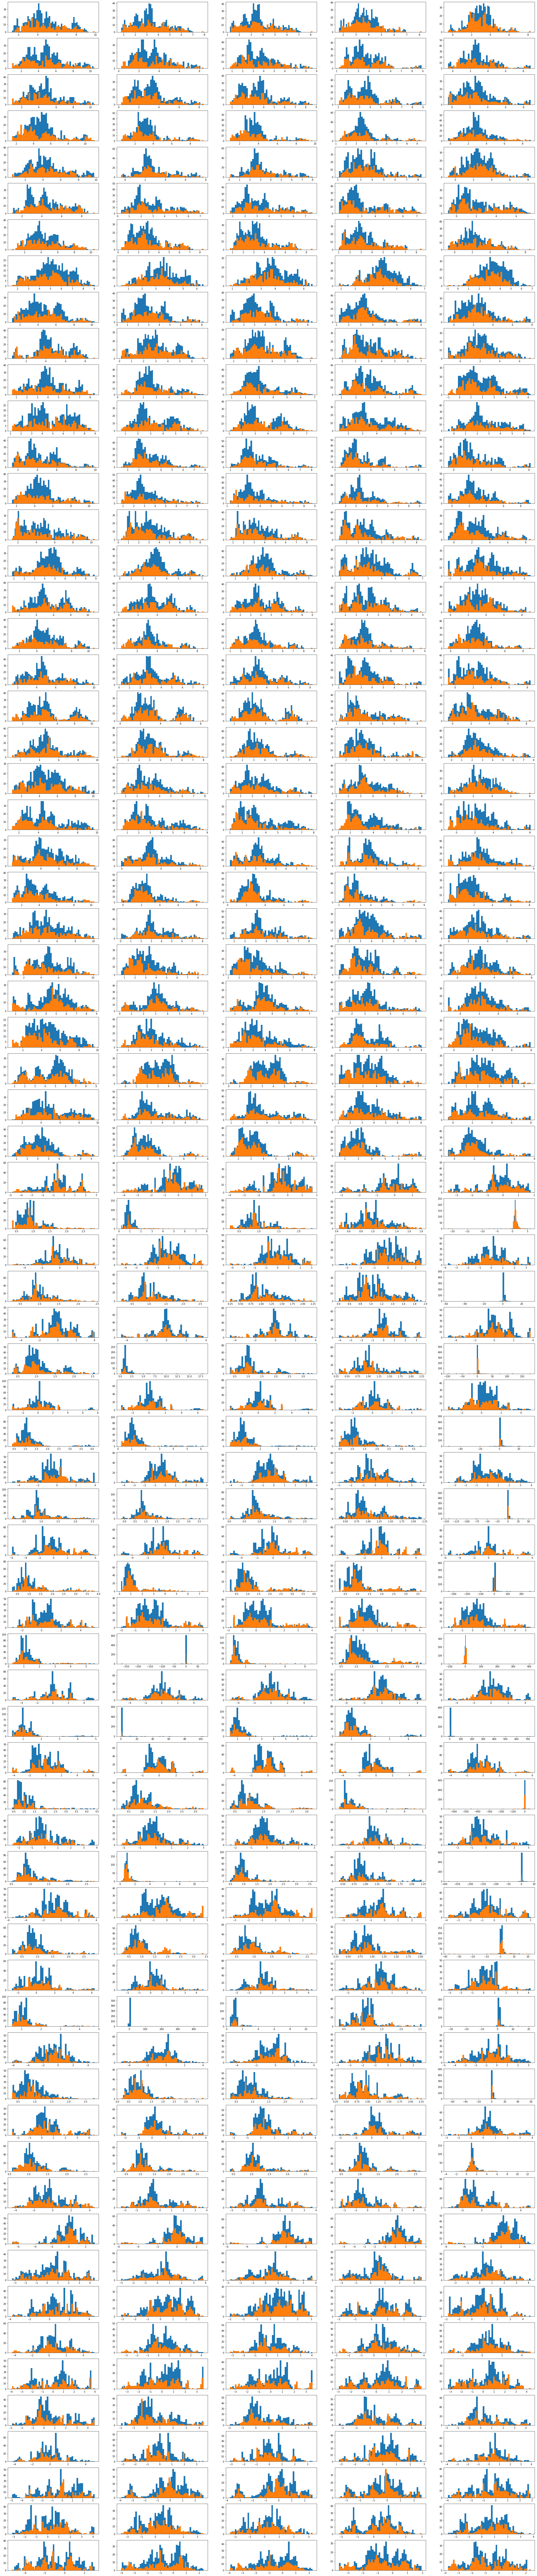

In [145]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(71, 5, figsize = (40, 200))
feat = 0
for i in range(71):
  for j in range(5):
    
    axes[i, j].hist(data_all[labels_all == 2, feat], bins = 50)
    axes[i, j].hist(data_all[labels_all == 1, feat], bins = 50)
    feat += 1

In [148]:
result_f1, result_acc, f1_sum, acc_sum, data_all,labels_all = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_sum['ALL4'] = result_f1
acc_data_sum['ALL4'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

0
0
(883, 355)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
(883, 355)
2
(883, 355)
3
(883, 355)
4
(883, 355)
0.6305451839826841
0.7571502976190477
*************************
[0.7169117647058824, 0.6793117513998591, 0.6978480456741327, 0.6608264462809917, 0.6590909090909091]
[0.7754010695187166, 0.7445652173913043, 0.7556818181818182, 0.7192982456140351, 0.7333333333333333]
0.682797783430355
0.7456559368078415
1
0
(926, 355)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
(926, 355)
2
(926, 355)
3
(926, 355)
4
(926, 355)
0.5499484022921522
0.7321502976190476
*************************
[0.6644392033542977, 0.6656162464985995, 0.6529850746268656, 0.648949369621773, 0.6446422458062308]
[0.7360406091370558, 0.7382198952879581, 0.7204301075268817, 0.7262569832402235, 0.7225433526011561]
0.6553264279815533
0.7286981895586552
valence                                      0.7434
arousal                                    0.726912
ALL4       [0.7571502976190477, 0.7321502976190476]
dtype: object
valence                                    0.641367
arousal                                    0.564995
ALL4       [0.6305451839826841, 0.5499484022921522]
dtype: object


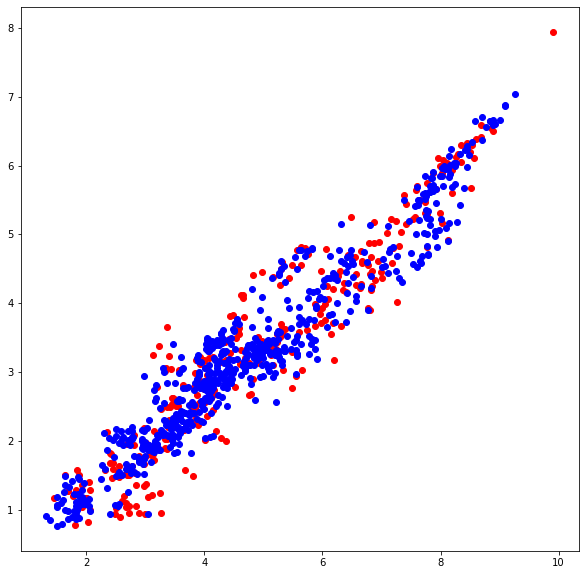

In [149]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=100, svd_solver='full')
#pca.fit(data_all)
data_1 = data_all[labels_all == 1, :]
data_2 = data_all[labels_all ==2, :]
fig, axes = plt.subplots(figsize = (10, 10))
axes.scatter(data_1[:,0], data_1[:, 1], color = 'r')
axes.scatter(data_2[:,0], data_2[:, 1], color = 'b')

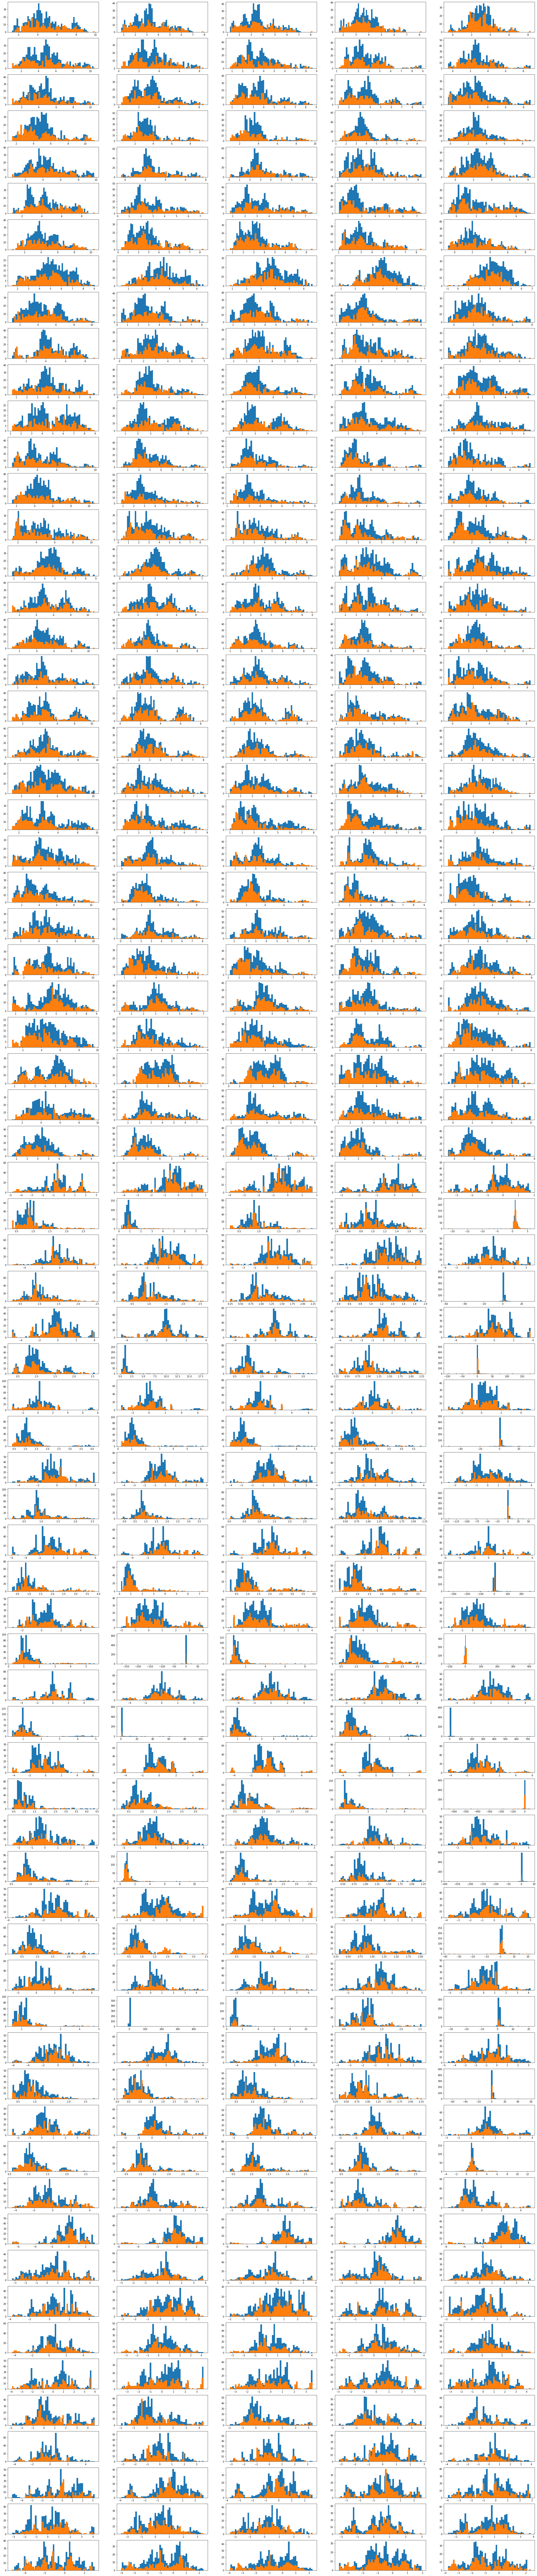

In [150]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(71, 5, figsize = (40, 200))
feat = 0
for i in range(71):
  for j in range(5):
    
    axes[i, j].hist(data_all[labels_all == 2, feat], bins = 50)
    axes[i, j].hist(data_all[labels_all == 1, feat], bins = 50)
    feat += 1

In [95]:
f1_data_sum['ALL4'] = result_f1
acc_data_sum['ALL4'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

        DCAU1      ALL4
valence   NaN  0.744702
arousal   NaN  0.737031
        DCAU1      ALL4
valence   NaN  0.617903
arousal   NaN  0.557041


In [112]:
acc_data_sum = np.mean(acc_data_sum, axis = 1)
f1_data_sum = np.mean(f1_data_sum, axis = 1)
print(acc_data_sum)
print(f1_data_sum)

valence    0.743400
arousal    0.726912
dtype: float64
valence    0.641367
arousal    0.564995
dtype: float64


In [ ]:
print(acc_data_sum)
print(f1_data_sum)

0     0.925
1     0.450
2     0.725
3     0.925
4     0.900
5     0.875
6     0.700
7     0.425
8     0.750
9     0.650
10    0.800
11    0.775
12    0.600
13    0.550
14    0.575
15    0.675
16    0.650
17    0.475
18    0.775
19    0.600
20    0.475
21    0.575
22    0.675
23    0.800
24    0.775
25    0.500
26    0.625
27    0.825
28    0.525
29    0.875
30    0.700
31    0.600
dtype: float64
0     0.779048
1     0.328796
2     0.419780
3     0.680000
4     0.573333
5     0.565714
6     0.409524
7     0.374632
8     0.722179
9     0.555897
10    0.619261
11    0.742178
12    0.580029
13    0.492410
14    0.537143
15    0.498954
16    0.513846
17    0.381818
18    0.758961
19    0.591111
20    0.444704
21    0.434326
22    0.438002
23    0.443810
24    0.754113
25    0.458355
26    0.608889
27    0.724755
28    0.509553
29    0.466667
30    0.686537
31    0.504802
dtype: float64


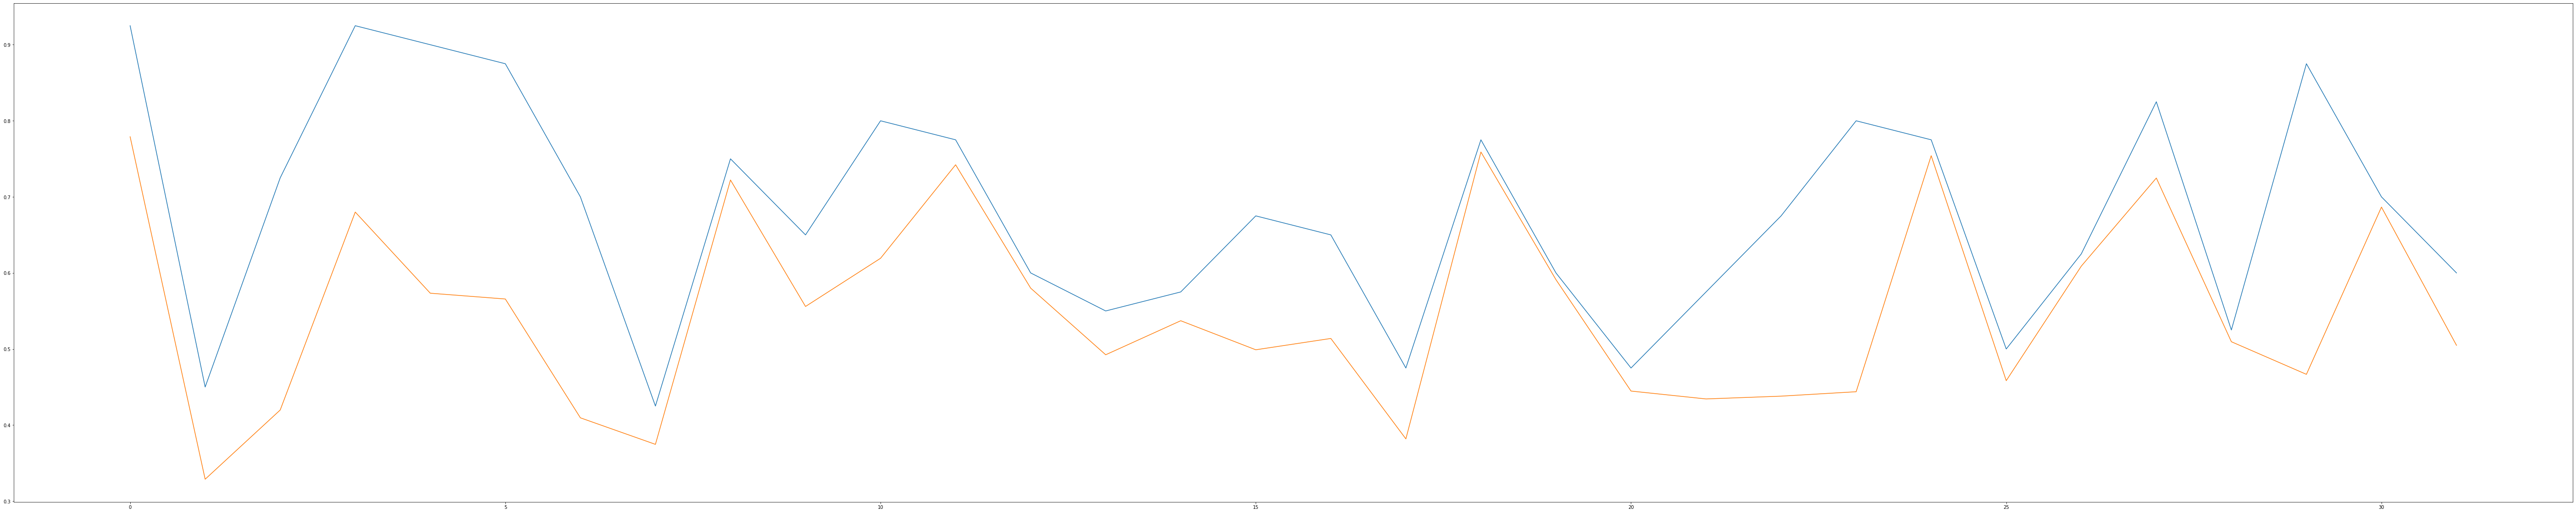

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (100, 20))
plt.plot(acc_data_sum.values)
plt.plot(f1_data_sum.values)

In [ ]:
# acc_data_sum.to_csv("acc_sum1.csv")
# f1_data_sum.to_csv("f1_sum1.csv")
# acc_data_neural.to_csv("acc_neural1.csv")
# f1_data_neural.to_csv("f1_neural1.csv")

In [ ]:
import pandas as pd
emotion = ['valence', 'arousal', 'dominance', 'like']
f1_data_neural = pd.DataFrame(columns = features, index = emotion)
acc_data_neural = pd.DataFrame(columns = features, index = emotion)

In [ ]:
result_f1, result_acc = get_metrics(['DE'])
f1_data_neural['DE'] = result_f1
acc_data_neural['DE'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['DASM'])
f1_data_neural['DASM'] = result_f1
acc_data_neural['DASM'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['RASM'])
f1_data_neural['RASM'] = result_f1
acc_data_neural['RASM'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['DCAU'])
f1_data_neural['DCAU'] = result_f1
acc_data_neural['DCAU'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

In [ ]:
result_f1, result_acc, f1_n, acc_n = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_neural['ALL4'] = result_f1
acc_data_neural['ALL4'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[[2 3]
 [2 1]]
[[0 0]
 [5 5]]
[[6]]
[[3 0]
 [2 5]]
[[3 0]
 [0 3]]
[[3 0]
 [0 3]]
[[2 0]
 [2 4]]
[[2 0]
 [2 4]]
[[4 1]
 [0 3]]
[[3 1]
 [0 2]]
[[3 1]
 [1 3]]
[[4 0]
 [0 4]]
[[3 0]
 [0 3]]
[[5]]
[[5]]
[[2 0]
 [2 4]]
[[4 2]
 [0 2]]
[[0 0]
 [4 4]]
[[3 1]
 [0 2]]
[[0 0]
 [4 4]]
[[4 1]
 [0 3]]
[[1 0]
 [2 3]]
[[0 0]
 [5 5]]
[[0 1]
 [5 4]]
[[2 0]
 [3 5]]
[[3 2]
 [1 2]]
[[3 0]
 [0 3]]
[[0 0]
 [4 4]]
[[0 0]
 [4 4]]
[[0 1]
 [0 3]]
[[3 4]
 [1 0]]
[[0 0]
 [4 4]]
1
[[3 2]
 [1 2]]
[[5 0]
 [0 5]]
[[0 0]
 [5 5]]
[[0 0]
 [5 5]]
[[0 0]
 [3 3]]
[[3 1]
 [0 2]]
[[2 1]
 [2 3]]
[[2 2]
 [2 2]]
[[3 3]
 [1 1]]
[[3 2]
 [0 1]]
[[4 0]
 [0 4]]
[[2 0]
 [2 4]]
[[2 0]
 [1 3]]
[[0 0]
 [4 4]]
[[0 0]
 [4 4]]
[[4 0]
 [0 4]]
[[4 0]
 [0 4]]
[[4 1]
 [0 3]]
[[1 1]
 [2 2]]
[[0 0]
 [4 4]]
[[1 1]
 [2 2]]
[[3 2]
 [0 1]]
[[2 2]
 [3 3]]
[[0 0]
 [5 5]]
[[2 1]
 [3 4]]
[[4 0]
 [0 4]]
[[3 0]
 [0 3]]
[[4 1]
 [0 3]]
[[0 0]
 [4 4]]
[[4]]
[[4 1]
 [0 3]]
[[2 1]
 [2 3]]
2
[[0 1]
 [4 3]]
[[2 0]
 [2 4]]
[[0 0]
 [5 5]]
[[0 1]
 [5 4]]
[[0 0]
 [3 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[[2 2]
 [3 3]]
[[0 1]
 [4 3]]
[[2 0]
 [1 3]]
[[0 1]
 [5 4]]
[[0 0]
 [4 4]]
[[4]]
[[0 0]
 [4 4]]
[[3 2]
 [1 2]]
[[0 0]
 [6 6]]
[[7]]
[[4 2]
 [2 4]]
[[0 0]
 [2 2]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 2]
 [0 3]]
[[0 0]
 [5 5]]
[[0 1]
 [0 4]]
[[0 1]
 [0 6]]
[[0 2]
 [4 2]]
[[5 5]
 [0 0]]
[[0 1]
 [6 5]]
[[0 3]
 [6 3]]
[[3 2]
 [0 1]]
[[2 1]
 [2 3]]
[[4 1]
 [0 3]]
[[5 1]
 [0 4]]
[[3 0]
 [0 3]]
[[2 1]
 [2 3]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[3 4]
 [1 0]]
[[2 2]
 [3 3]]
1
[[2 1]
 [3 4]]
[[2 2]
 [1 1]]
[[3 0]
 [0 3]]
[[0 1]
 [5 4]]
[[0 1]
 [4 3]]
[[4]]
[[4 1]
 [0 3]]
[[3 3]
 [0 0]]
[[0 0]
 [5 5]]
[[7]]
[[0 0]
 [6 6]]
[[2 1]
 [0 1]]
[[2 0]
 [2 4]]
[[5 0]
 [0 5]]
[[5]]
[[0 0]
 [5 5]]
[[0 0]
 [4 4]]
[[0 0]
 [6 6]]
[[0 1]
 [4 3]]
[[4 2]
 [0 2]]
[[6]]
[[0 1]
 [5 4]]
[[1 2]
 [2 1]]
[[3 0]
 [0 3]]
[[3 2]
 [1 2]]
[[3 1]
 [2 4]]
[[0 1]
 [3 2]]
[[2 1]
 [1 2]]
[[0 0]
 [5 5]]
[[4 4]
 [0 0]]
[[3 4]
 [1 0]]
[[0 2]
 [4 2]]
2
[[3 1]
 [2 4]]
[[0 0]
 [3 3]]
[[0 0]
 [3 3]]
[[0 0]
 [4 4]]
[[4]]
[[4]]
[[0 0]
 [3 3]]
[[3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[[0 1]
 [6 5]]
[[4 3]
 [0 1]]
[[0 0]
 [5 5]]
[[3 1]
 [1 3]]
[[0 1]
 [4 3]]
[[2 0]
 [0 2]]
[[4 0]
 [0 4]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[0 1]
 [4 3]]
[[4 0]
 [0 4]]
[[4 1]
 [0 3]]
[[1 0]
 [2 3]]
[[4]]
[[6]]
[[0 0]
 [4 4]]
[[2 1]
 [0 1]]
[[0 0]
 [5 5]]
[[4 0]
 [0 4]]
[[5]]
[[2 1]
 [2 3]]
[[7]]
[[2 2]
 [2 2]]
[[8]]
[[0 1]
 [5 4]]
[[0 2]
 [5 3]]
[[3]]
[[3 0]
 [1 4]]
[[7]]
[[3 0]
 [0 3]]
[[2 3]
 [1 0]]
[[2 1]
 [3 4]]
1
[[3 1]
 [2 4]]
[[1 2]
 [2 1]]
[[5 2]
 [0 3]]
[[1 2]
 [3 2]]
[[0 0]
 [3 3]]
[[2 1]
 [0 1]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[3 2]
 [1 2]]
[[1 1]
 [3 3]]
[[4 1]
 [0 3]]
[[2 0]
 [2 4]]
[[2 3]
 [1 0]]
[[3]]
[[6]]
[[2 3]
 [2 1]]
[[2 0]
 [0 2]]
[[0 0]
 [5 5]]
[[2 0]
 [1 3]]
[[5]]
[[0 0]
 [4 4]]
[[7]]
[[0 1]
 [4 3]]
[[8]]
[[0 2]
 [5 3]]
[[5 1]
 [0 4]]
[[0 1]
 [0 2]]
[[2 2]
 [2 2]]
[[7]]
[[0 2]
 [3 1]]
[[3 0]
 [0 3]]
[[2 1]
 [3 4]]
2
[[2 0]
 [3 5]]
[[1 2]
 [2 1]]
[[0 0]
 [5 5]]
[[2 3]
 [1 0]]
[[2 1]
 [1 2]]
[[0 0]
 [2 2]]
[[0 0]
 [3 3]]
[[5 0]
 [0 5]]
[[2 0]
 [2 4]]
[[1 2]
 [3 2]]
[[2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[[7]]
[[0 1]
 [5 4]]
[[0 0]
 [5 5]]
[[8]]
[[0 0]
 [7 7]]
[[5]]
[[0 0]
 [5 5]]
[[3 1]
 [1 3]]
[[3 1]
 [2 4]]
[[0 0]
 [6 6]]
[[3 0]
 [2 5]]
[[6 0]
 [0 6]]
[[1 2]
 [3 2]]
[[0 0]
 [5 5]]
[[5]]
[[5 0]
 [0 5]]
[[0 1]
 [5 4]]
[[0 1]
 [5 4]]
[[4 1]
 [0 3]]
[[3 2]
 [2 3]]
[[0 1]
 [4 3]]
[[0 1]
 [5 4]]
[[0 0]
 [6 6]]
[[0 0]
 [6 6]]
[[3 2]
 [2 3]]
[[2 4]
 [2 0]]
[[2 0]
 [2 4]]
[[2 0]
 [4 6]]
[[3 3]
 [1 1]]
[[6]]
[[2 0]
 [2 4]]
[[2 1]
 [3 4]]
1
[[7]]
[[0 0]
 [5 5]]
[[5 0]
 [0 5]]
[[8]]
[[7]]
[[5]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[1 0]
 [4 5]]
[[0 1]
 [5 4]]
[[5 0]
 [0 5]]
[[5 0]
 [0 5]]
[[1 2]
 [3 2]]
[[0 1]
 [5 4]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 0]
 [5 5]]
[[0 2]
 [5 3]]
[[1 0]
 [3 4]]
[[2 0]
 [2 4]]
[[0 0]
 [4 4]]
[[2 2]
 [3 3]]
[[0 1]
 [6 5]]
[[0 0]
 [6 6]]
[[3 2]
 [2 3]]
[[0 0]
 [4 4]]
[[4 2]
 [0 2]]
[[0 1]
 [6 5]]
[[2 0]
 [2 4]]
[[0 0]
 [5 5]]
[[3 0]
 [0 3]]
[[2 0]
 [3 5]]
2
[[7]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 0]
 [7 7]]
[[7]]
[[4]]
[[0 1]
 [5 4]]
[[3 3]
 [1 1]]
[[2 1]
 [3 4]]
[[3 3]
 [

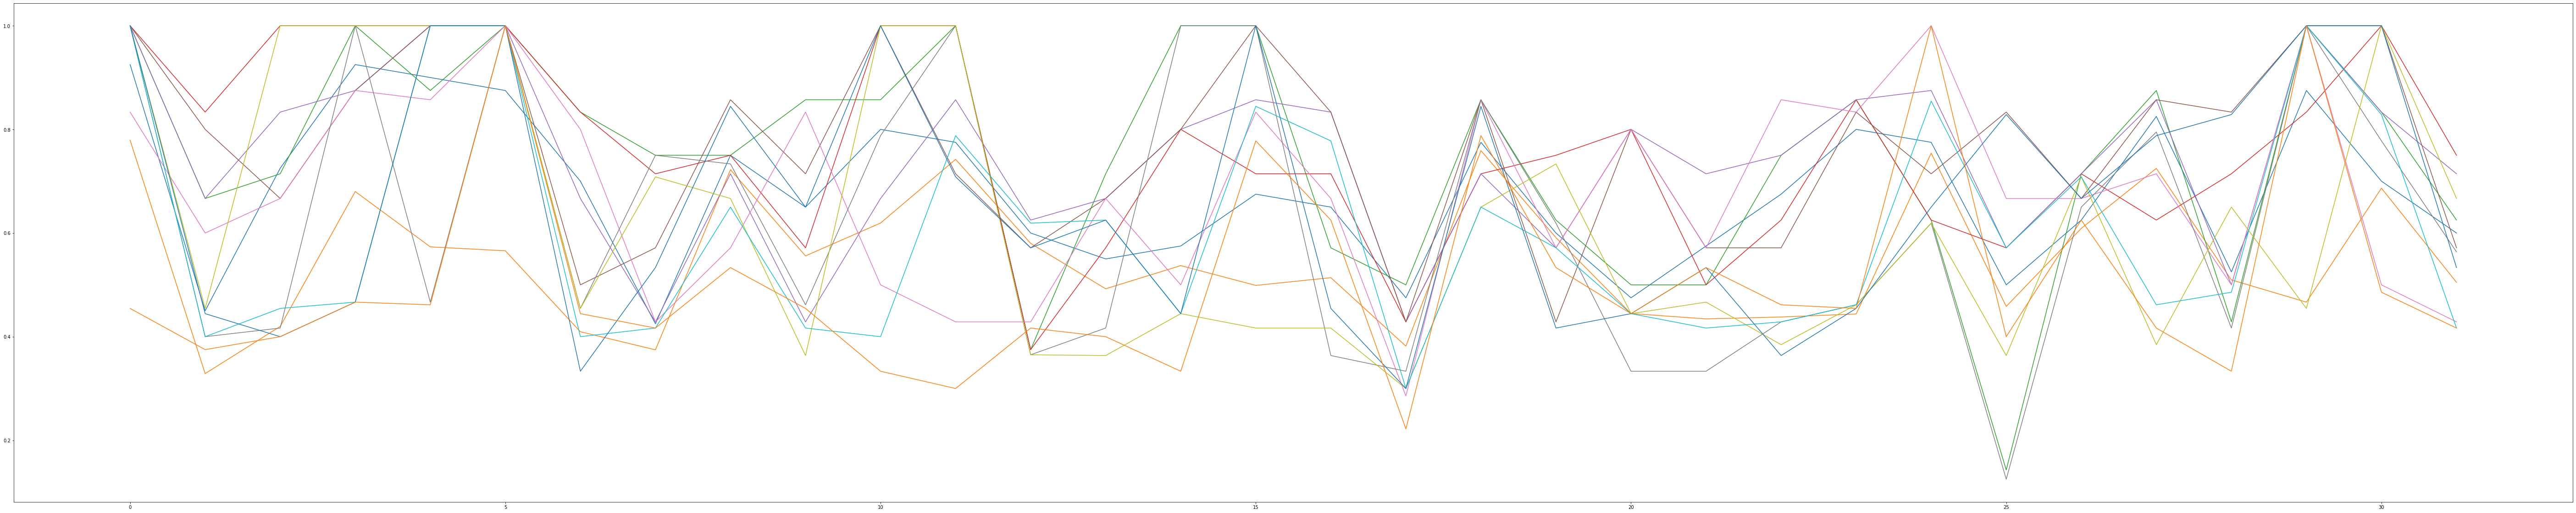

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (100, 20))
plt.plot(acc_data_sum.values)
plt.plot(f1_data_sum.values)
plt.plot(acc_n.values)
plt.plot(f1_n.values)

In [ ]:
result_f1, result_acc = get_metrics(['alpha/beta'])
f1_data_neural['alpha/beta'] = result_f1
acc_data_neural['alpha/beta'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['alpha/(beta + teta)'])
f1_data_neural['alpha/(beta + teta)'] = result_f1
acc_data_neural['alpha/(beta + teta)'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

In [ ]:
#f1_data_neural.drop(columns = ['feature1', 'feature2'], inplace = True)
acc_data_neural.drop(columns = ['feature1', 'feature2'], inplace = True)

In [ ]:
print(acc_data_neural)
print(f1_data_neural)

            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.686510
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.610149
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.674167
like       NaN  NaN  NaN  NaN        NaN                 NaN  0.635417
            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.630356
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.522650
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.625382
like       NaN  NaN  NaN  NaN        NaN                 NaN  0.567707
